# Hypothesis Testing with Men's and Women's Soccer Matches

## Exploratory data analysis

In [1]:
library(tidyverse)
library(gridExtra) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
women <- read_csv("women_results.csv")
men <- read_csv("men_results.csv")

New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Filtering the data & Calculating the test values

In [3]:
men <- men %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

In [4]:
women <- women %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

## Choosing the correct hypothesis test

In [5]:
men_plot <- ggplot(men, aes(x = goals_scored)) +
  geom_histogram(color = "red", bins = 30) +
  ggtitle("Goals Scored (Men's)") +
  xlab("Goals Scored") +
  ylab("Frequency")

In [6]:
women_plot <- ggplot(women, aes(x = goals_scored)) +
  geom_histogram(color = "blue", bins = 30) +
  ggtitle("Goals Scored (Women's)") +
  xlab("Goals Scored") +
  ylab("Frequency")

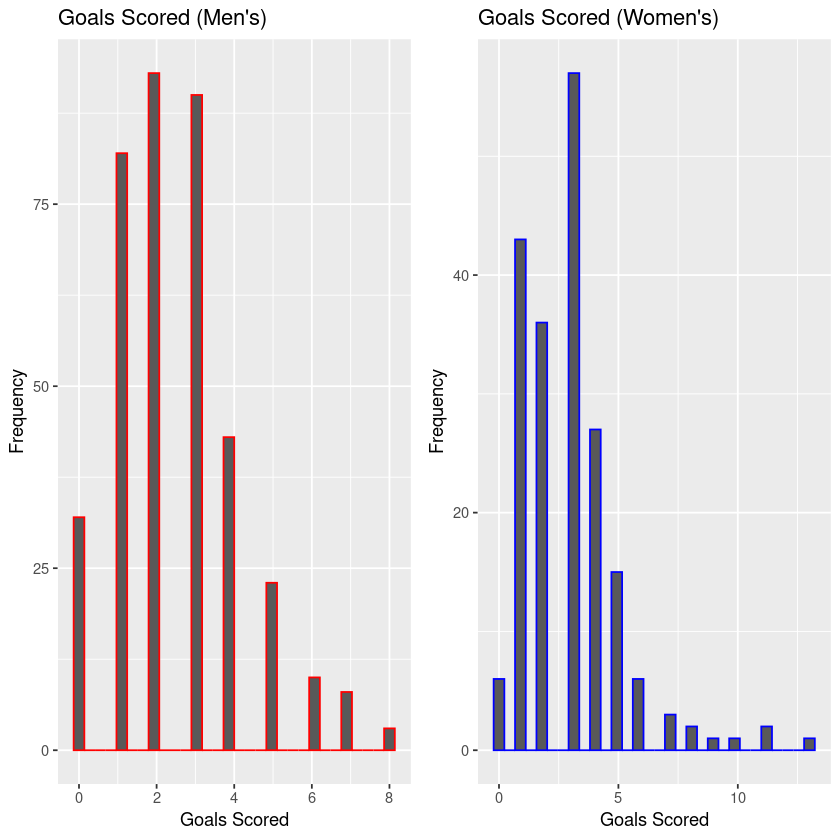

In [7]:
grid.arrange(men_plot, women_plot, nrow = 1)

## Performing the hypothesis test

In [8]:
test_results <- wilcox.test(
  x = women$goals_scored,
  y = men$goals_scored,
  alternative = "greater"
)

## Interpreting the result of the hypothesis test

In [9]:
p_val <- round(test_results$p.value, 4)
result <- ifelse(p_val <= 0.10, "reject", "fail to reject")

In [10]:
result_df <- data.frame(p_val, result)